In [342]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.read_csv('D:\Hutson\learning-materials\AI_ML\AIMLDLCV_advance\Class\Datasets\Time-series-datasets\co2.csv')
data.head()

,time,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4


In [343]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284 entries, 0 to 2283
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    2284 non-null   object 
 1   co2     2225 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.8+ KB


In [344]:
data['time'] = pd.to_datetime(data['time'])
data['co2'] =data['co2'].interpolate()
data

,time,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4
...,...,...
2279,2001-12-01,370.3
2280,2001-12-08,370.8
2281,2001-12-15,371.2
2282,2001-12-22,371.3


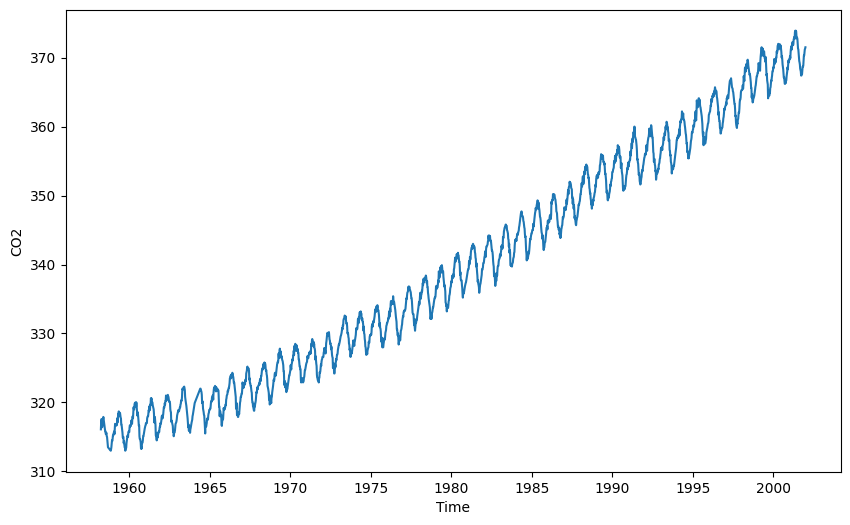

In [345]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data['time'], data['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2')
plt.show()

In [346]:
# data['co2_1'] = data['co2'].shift(-1)
# data.head()

In [347]:
def create_recursive_data(data, window_size):
    i = 1
    while i < window_size:
        data['co2_{}'.format(i)] = data['co2'].shift(-i)
        i+=1
    data['target'] = data['co2'].shift(-i)
    data.dropna(axis=0, inplace=True)
    return data

In [348]:
window_size = 5
create_recursive_data(data, window_size)

,time,co2,co2_1,co2_2,co2_3,co2_4,target
0,1958-03-29,316.1,317.3,317.6,317.5,316.4,316.90
1,1958-04-05,317.3,317.6,317.5,316.4,316.9,317.20
2,1958-04-12,317.6,317.5,316.4,316.9,317.2,317.50
3,1958-04-19,317.5,316.4,316.9,317.2,317.5,317.90
4,1958-04-26,316.4,316.9,317.2,317.5,317.9,317.55
...,...,...,...,...,...,...,...
2274,2001-10-27,368.7,368.7,368.8,369.7,370.3,370.30
2275,2001-11-03,368.7,368.8,369.7,370.3,370.3,370.80
2276,2001-11-10,368.8,369.7,370.3,370.3,370.8,371.20
2277,2001-11-17,369.7,370.3,370.3,370.8,371.2,371.30


In [349]:
test_size = 0.2

x_train = data.drop(['target','time'],axis = 1)[:int(len(data)*(1-test_size))]
x_test = data.drop(['target', 'time'],axis = 1)[int(len(data)*(1-test_size)):]
y_train = data['target'][:int(len(data)*(1-test_size))]
y_test = data['target'][int(len(data)*(1-test_size)):]

print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

(1823, 5) (1823,) (456, 5) (456,)


In [350]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [351]:
y_pred = model.predict(x_test)
print('r2_score: {}'.format(r2_score(y_test,y_pred)))

r2_score: 0.9907505918201437


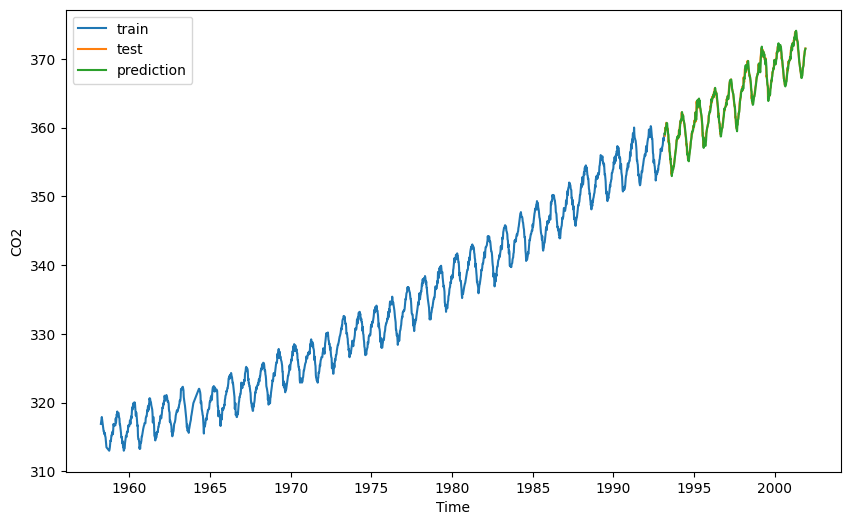

In [352]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data['time'][:int(len(data)*(1-test_size))], y_train, label = 'train')
ax.plot(data['time'][int(len(data)*(1-test_size)):], y_test, label = 'test')
ax.plot(data['time'][int(len(data)*(1-test_size)):], y_pred, label = 'prediction')
plt.legend()
ax.set_xlabel('Time')
ax.set_ylabel('CO2')
plt.show()

## futher future

In [353]:
data = [359,360,362,361,362.7]
y_pred = model.predict([data])
y_pred

future = 10
for _ in range(future):
    print(data)
    y_pred = model.predict([data]).tolist()
    print(y_pred)
    print('______')
    data = data[1:] + y_pred

[359, 360, 362, 361, 362.7]
[363.29828133681985]
______
[360, 362, 361, 362.7, 363.29828133681985]
[363.51428454616536]
______
[362, 361, 362.7, 363.29828133681985, 363.51428454616536]
[363.8954067207945]
______
[361, 362.7, 363.29828133681985, 363.51428454616536, 363.8954067207945]
[364.3813371360209]
______
[362.7, 363.29828133681985, 363.51428454616536, 363.8954067207945, 364.3813371360209]
[364.5618033898971]
______
[363.29828133681985, 363.51428454616536, 363.8954067207945, 364.3813371360209, 364.5618033898971]
[364.746456944226]
______
[363.51428454616536, 363.8954067207945, 364.3813371360209, 364.5618033898971, 364.746456944226]
[364.9573340683238]
______
[363.8954067207945, 364.3813371360209, 364.5618033898971, 364.746456944226, 364.9573340683238]
[365.09251661160016]
______
[364.3813371360209, 364.5618033898971, 364.746456944226, 364.9573340683238, 365.09251661160016]
[365.17857918139543]
______
[364.5618033898971, 364.746456944226, 364.9573340683238, 365.09251661160016, 365.1

d:\Hutson\learning-materials\AI_ML\AIMLDLCV_advance\Class\sklearn-env\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

d:\Hutson\learning-materials\AI_ML\AIMLDLCV_advance\Class\sklearn-env\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

d:\Hutson\learning-materials\AI_ML\AIMLDLCV_advance\Class\sklearn-env\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

d:\Hutson\learning-materials\AI_ML\AIMLDLCV_advance\Class\sklearn-env\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

d:\Hutson\learning-materials\AI_ML\AIMLDLCV_advance\Class\sklearn-env\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature